In [1]:
import numpy
import pandas as pd
import os
import csv
import ast
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

from wquantiles import quantile
from openfisca_survey_manager.utils import asof

from openfisca_france_indirect_taxation import FranceIndirectTaxationTaxBenefitSystem
from openfisca_france_indirect_taxation.examples.utils_example import (
    wavg,
    collapse,
    dataframe_by_group,
    graph_builder_bar,
    df_weighted_average_grouped)
from openfisca_france_indirect_taxation.build_survey_data.utils import weighted_sum
from openfisca_france_indirect_taxation.almost_ideal_demand_system.utils import add_niveau_vie_decile
from openfisca_france_indirect_taxation.surveys import SurveyScenario
from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy
from openfisca_france_indirect_taxation.utils import assets_directory, get_input_data_frame

In [2]:
from openfisca_france_indirect_taxation.projects.TVA_Herve_IPP.new_calage_bdf_cn import (
    new_get_bdf_aggregates,
    new_get_cn_aggregates,
    new_get_inflators_bdf_to_cn,
    new_get_inflators_cn_to_cn,
    new_get_inflators,
    new_get_inflators_by_year)

In [28]:
data_year = 2017
inflators_by_year = new_get_inflators_by_year(rebuild = True, year_range = range(2017, 2024), data_year = data_year)
simulated_variables = ['tva_taux_plein',
'tva_taux_intermediaire',
 'tva_taux_reduit',
 'tva_taux_super_reduit',
 'tva_total',
 'depenses_tva_taux_plein',
 'depenses_tva_taux_intermediaire',
 'depenses_tva_taux_reduit',
 'depenses_tva_taux_super_reduit',
 'rev_disp_yc_loyerimpute',
 'loyer_impute',
 'depenses_tot',
 'depenses_totales',
 'pondmen',
]

agregates = pd.DataFrame(columns=['tva_total',
 'tva_taux_super_reduit',
 'tva_taux_reduit',
 'tva_taux_intermediaire',
 'tva_taux_plein',
 'depenses_tva_taux_plein',
 'depenses_tva_taux_intermediaire',
 'depenses_tva_taux_reduit',
 'depenses_tva_taux_super_reduit',
 'depenses_totales',
 'depenses_tot',
 'loyer_impute', 
 'rev_disp_yc_loyerimpute'])
for year in range(2017,2024) :
    inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
    survey_scenario = SurveyScenario.create(
        inflation_kwargs = inflation_kwargs,
        year = year,
        data_year = data_year
        )
    df_sum = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', variables = simulated_variables, aggfunc = 'sum')
    agregates.loc[year] = df_sum.sum()

c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\TVA_Herve_IPP\new_calage_bdf_cn.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_bdf_postes_cn[poste] = 0


In [30]:
agregates['Total_depenses'] = agregates['depenses_tot'] + agregates['loyer_impute']
agregates

,tva_total,tva_taux_super_reduit,tva_taux_reduit,tva_taux_intermediaire,tva_taux_plein,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_totales,depenses_tot,loyer_impute,rev_disp_yc_loyerimpute,Total_depenses
2017,1.010260e+11,2.916588e+08,7.862741e+09,1.441827e+10,7.845328e+10,4.707197e+11,1.586010e+11,1.508217e+11,1.418017e+10,7.943225e+11,1.007982e+12,1.891127e+11,1.387077e+12,1.197095e+12
2018,1.040917e+11,2.906346e+08,7.973502e+09,1.514731e+10,8.068022e+10,4.840814e+11,1.666204e+11,1.529463e+11,1.413038e+10,8.177784e+11,1.040887e+12,1.925339e+11,1.426805e+12,1.233421e+12
2019,1.064033e+11,2.915240e+08,8.136745e+09,1.592258e+10,8.205242e+10,4.923145e+11,1.751484e+11,1.560776e+11,1.417362e+10,8.377141e+11,1.064269e+12,1.967170e+11,1.475381e+12,1.260986e+12
2020,9.574417e+10,2.828792e+08,8.580251e+09,1.126653e+10,7.561451e+10,4.536871e+11,1.239319e+11,1.645848e+11,1.375332e+10,7.559571e+11,9.805093e+11,2.002478e+11,1.489995e+12,1.180757e+12
2021,1.051505e+11,2.987876e+08,8.638843e+09,1.295723e+10,8.325562e+10,4.995337e+11,1.425295e+11,1.657087e+11,1.452677e+10,8.222988e+11,1.056517e+12,2.037834e+11,1.562187e+12,1.260300e+12
2022,1.159243e+11,3.059662e+08,9.029455e+09,1.796930e+10,8.861955e+10,5.317173e+11,1.976623e+11,1.732013e+11,1.487579e+10,9.174568e+11,1.165422e+12,2.080976e+11,1.642992e+12,1.373519e+12
2023,1.228717e+11,3.112216e+08,9.769284e+09,1.996829e+10,9.282289e+10,5.569374e+11,2.196512e+11,1.873926e+11,1.513130e+10,9.791125e+11,1.269737e+12,2.136968e+11,1.773999e+12,1.483434e+12


In [70]:
cn_agregates_by_year = pd.DataFrame()
for year in range(2017,2024):
    cn_agregates = new_get_cn_aggregates(year)
    cn_agregates.drop(['poste_02_4', 'poste_04_4_3','rev_disp_yc_loyerimpute','rev_disponible'], axis= 0, inplace = True)
    cn_agregates_by_year = pd.concat([cn_agregates_by_year,pd.DataFrame(cn_agregates.sum())])
cn_agregates_by_year

c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,0
conso_CN_2017,1.197358e+12
conso_CN_2018,1.233693e+12
conso_CN_2019,1.261263e+12
conso_CN_2020,1.181017e+12
conso_CN_2021,1.260578e+12
conso_CN_2022,1.373821e+12
conso_CN_2023,1.483760e+12


In [71]:
agregates['Total_depenses']

2017    1.197095e+12
2018    1.233421e+12
2019    1.260986e+12
2020    1.180757e+12
2021    1.260300e+12
2022    1.373519e+12
2023    1.483434e+12
Name: Total_depenses, dtype: float64

**Par postes agrégés**

In [3]:
from openfisca_france_indirect_taxation.projects.TVA_Herve_IPP.new_calage_bdf_cn_by_postes_agreges import (get_bdf_aggregates,
    get_cn_aggregates,
    get_inflators_bdf_to_cn,
    get_inflators_cn_to_cn,
    get_inflators_by_year)

In [4]:
aggregates_13_postes = get_cn_aggregates(2017)
aggregates_13_postes


c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,conso_CN_2017
Code,
poste_01,1.476417e+11
poste_02,4.437250e+10
poste_03,4.668480e+10
poste_04,3.385410e+11
poste_05,5.182270e+10
poste_06,4.877010e+10
poste_07,1.562935e+11
poste_08,4.586530e+10
poste_09,8.315850e+10


In [5]:
data_year = 2017
inflators = new_get_inflators(2017,2017)
simulated_variables = ["poste_agrege_0{}".format(i) for i in range(1, 10)] + ["poste_agrege_10", "poste_agrege_11", "poste_agrege_12", "poste_agrege_13"]

agregates = pd.DataFrame(columns=["poste_agrege_0{}".format(i) for i in range(1, 10)] + ["poste_agrege_10", "poste_agrege_11", "poste_agrege_12", "poste_agrege_13"])
inflation_kwargs = dict(inflator_by_variable = inflators)
survey_scenario = SurveyScenario.create(
    inflation_kwargs = inflation_kwargs,
    year = 2017,
    data_year = data_year
    )
df_sum = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', variables = simulated_variables, aggfunc = 'sum')
agregates = df_sum.sum()

c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\TVA_Herve_IPP\new_calage_bdf_cn.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_bdf_postes_cn[poste] = 0


In [6]:
agregates.T

poste_agrege_01    1.476093e+11
poste_agrege_02    4.100686e+10
poste_agrege_03    4.667432e+10
poste_agrege_04    1.438479e+11
poste_agrege_05    5.181112e+10
poste_agrege_06    4.875946e+10
poste_agrege_07    1.562586e+11
poste_agrege_08    4.585530e+10
poste_agrege_09    8.314022e+10
poste_agrege_10    8.876605e+09
poste_agrege_11    8.477814e+10
poste_agrege_12    7.186829e+10
poste_agrege_13    7.749570e+10
dtype: float64

In [7]:
aggregates_13_postes

,conso_CN_2017
Code,
poste_01,1.476417e+11
poste_02,4.437250e+10
poste_03,4.668480e+10
poste_04,3.385410e+11
poste_05,5.182270e+10
poste_06,4.877010e+10
poste_07,1.562935e+11
poste_08,4.586530e+10
poste_09,8.315850e+10


In [8]:
agregates['depenses_tva_exonere'] = agregates['depenses_tot'] - agregates['depenses_totales']

In [9]:
agregates[['depenses_tva_taux_plein', 'depenses_tva_taux_intermediaire' , 'depenses_tva_taux_reduit','depenses_tva_taux_super_reduit','depenses_tva_exonere']]

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere
2017,5.026024e+11,1.576007e+11,1.629979e+11,1.418017e+10,2.144649e+11
2018,5.159841e+11,1.656033e+11,1.651225e+11,1.413038e+10,2.239150e+11
2019,5.242447e+11,1.740834e+11,1.682538e+11,1.417362e+10,2.273555e+11
2020,4.855982e+11,1.229783e+11,1.767611e+11,1.375332e+10,2.253564e+11
2021,5.314100e+11,1.413800e+11,1.778850e+11,1.452677e+10,2.350335e+11
2022,5.635694e+11,1.964082e+11,1.853776e+11,1.487579e+10,2.487794e+11
2023,5.887641e+11,2.184485e+11,1.995689e+11,1.513130e+10,2.914296e+11


In [228]:
inflators = new_get_inflators(2017, 2017)
inflators

c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\TVA_Herve_IPP\new_calage_bdf_cn.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_bdf_postes_cn[poste] = 0


{'loyer_impute': 1.400375394143792,
 'rev_disp_yc_loyerimpute': 1.2374029353480198,
 'rev_disponible': 1.21507990060363,
 'poste_01_1_1_2': 1.0288551574737594,
 'poste_01_1_1_4': 1.0288551574737594,
 'poste_01_1_1_5': 1.0288551574737594,
 'poste_01_1_1_3': 1.0288551574737594,
 'poste_01_1_1_1': 1.0288551574737594,
 'poste_01_1_2_1': 1.1102187472242049,
 'poste_01_1_2_3': 1.1102187472242049,
 'poste_01_1_2_2': 1.1102187472242049,
 'poste_01_1_2_5': 1.1102187472242049,
 'poste_01_1_2_4': 1.1102187472242049,
 'poste_01_1_2_7': 1.1102187472242049,
 'poste_01_1_2_6': 1.1102187472242049,
 'poste_01_1_3_0': 0.8727957960706688,
 'poste_01_1_3_2': 0.8727957960706688,
 'poste_01_1_3_1': 0.8727957960706688,
 'poste_01_1_3_3': 0.8727957960706688,
 'poste_01_1_3_4': 0.8727957960706688,
 'poste_01_1_4_1': 1.1286142021082546,
 'poste_01_1_4_2': 1.1286142021082546,
 'poste_01_1_4_3': 1.1286142021082546,
 'poste_01_1_4_4': 1.1286142021082546,
 'poste_01_1_4_6': 1.1286142021082546,
 'poste_01_1_4_5': 1.

**Structure de la consommation par type de taux de TVA, par décile de niveau de vie** 

In [207]:
simulated_variables = ['depenses_tva_taux_plein',
'depenses_tva_taux_intermediaire',
'depenses_tva_taux_reduit',
'depenses_tva_taux_super_reduit',
'depenses_totales',
'loyer_impute',
'tva_taux_plein',
 'tva_taux_intermediaire',
 'tva_taux_reduit',
 'tva_taux_super_reduit',
 'tva_total',
 'rev_disp_yc_loyerimpute',
 'depenses_tot',
 'pondmen'] + ["poste_agrege_0{}".format(i) for i in range(1, 10)] + ["poste_agrege_{}".format(i) for i in range(10, 14)] + ['poste_04_1_1_1',
 'poste_04_1_2_1',
 'poste_04_3_1_1',
 'poste_04_3_2_1',
 'poste_04_4_1_1',
 'poste_04_4_2_1',
 'poste_04_4_3_1',
 'poste_04_4_4_1',
 'poste_04_5_0_0',
 'poste_04_5_1_1',
 'poste_04_5_2_1',
 'poste_04_5_2_2',
 'poste_04_5_3_1',
 'poste_04_5_4_1',
 'poste_04_5_5_1',
 'poste_04_5_5_2',
 'poste_04_6_1_1']

In [73]:
data_year = 2017
year = 2019

In [224]:
inflators_by_year = new_get_inflators_by_year(rebuild = True, year_range = range(2017, 2024), data_year = data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[2017])
survey_scenario = SurveyScenario.create(
    inflation_kwargs = inflation_kwargs,
    year = year,
    data_year = data_year
    )
to_graph = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', variables = simulated_variables, aggfunc = 'mean')
to_graph['poste_agrege_12'] += to_graph['poste_agrege_13']
to_graph['poste_agrege_04'] += to_graph['loyer_impute']
to_graph['Total depenses'] = to_graph['depenses_tot'] + to_graph['loyer_impute']
to_graph.drop('poste_agrege_13', axis = 1, inplace = True)

c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\TVA_Herve_IPP\new_calage_bdf_cn.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_bdf_postes_cn[poste] = 0


In [225]:
to_graph

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_totales,loyer_impute,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,tva_taux_super_reduit,...,poste_04_5_0_0,poste_04_5_1_1,poste_04_5_2_1,poste_04_5_2_2,poste_04_5_3_1,poste_04_5_4_1,poste_04_5_5_1,poste_04_5_5_2,poste_04_6_1_1,Total depenses
niveau_vie_decile,,,,,,,,,,,,,,,,,,,,,
1.0,9351.130176,2632.561482,3458.686713,213.106678,15655.485088,3568.381437,1558.521659,239.323770,180.310690,4.383193,...,0.0,748.821318,240.468909,40.067364,72.433489,54.428752,53.613426,0.000000,0.0,24994.719994
2.0,10449.203142,2934.068516,4228.040510,355.685947,17966.998119,3653.295564,1741.533818,266.733499,220.419183,7.315773,...,0.0,787.313254,293.149621,48.909271,99.475437,73.551009,27.536447,0.000000,0.0,27547.564201
3.0,11678.689071,2945.571988,4172.592010,329.502806,19126.355887,4336.550635,1946.448134,267.779270,217.528503,6.777237,...,0.0,804.450904,323.802879,61.912705,97.988729,86.285028,23.589282,0.000000,0.0,30085.026852
4.0,12856.692371,3692.931747,4926.719433,411.037020,21887.380581,5280.474352,2142.782015,335.721066,256.843205,8.454238,...,0.0,864.879421,327.279199,59.539329,135.033468,86.226738,217.165739,18.544286,0.0,34476.851196
5.0,14834.428890,4164.091061,4763.146939,471.302380,24232.969257,5747.687996,2472.404759,378.553732,248.315729,9.693780,...,0.0,879.556499,320.735680,57.118193,119.504298,97.200907,0.000000,17.984981,0.0,37290.508396
6.0,17916.972382,4639.294660,5175.569406,510.616813,28242.453240,6585.720201,2986.162007,421.754058,269.816426,10.502402,...,0.0,937.064753,331.608857,48.329083,112.793320,99.517380,44.347191,17.246770,0.0,42615.584815
7.0,17814.766904,5807.253346,5414.361158,480.795612,29517.176997,7262.610366,2969.127752,527.932122,282.265286,9.889038,...,0.0,992.581975,378.725528,49.067604,110.006070,98.679010,0.000000,36.749768,0.0,44779.160903
8.0,21104.350546,6990.680691,6049.618466,585.533653,34730.183380,8158.808756,3517.391684,635.516422,315.382968,12.043297,...,0.0,989.338783,362.383509,52.201572,121.619960,91.298057,92.685536,22.153642,0.0,50951.891037
9.0,21601.194513,8435.208214,6542.310802,762.031701,37340.745274,9473.473873,3600.198993,766.837104,341.068351,15.673521,...,0.0,1090.857344,425.411742,36.911233,87.996634,98.207916,53.099599,0.000000,0.0,55112.941364


In [229]:
to_graph[['poste_04_1_1_1',
 'poste_04_1_2_1',
 'loyer_impute',
 'poste_04_3_1_1',
 'poste_04_3_2_1',
 'poste_04_4_1_1',
 'poste_04_4_2_1',
 'poste_04_4_3_1',
 'poste_04_4_4_1',
 'poste_04_5_0_0',
 'poste_04_5_1_1',
 'poste_04_5_2_1',
 'poste_04_5_2_2',
 'poste_04_5_3_1',
 'poste_04_5_4_1',
 'poste_04_5_5_1',
 'poste_04_5_5_2',
 'poste_04_6_1_1', 'Total depenses']]

,poste_04_1_1_1,poste_04_1_2_1,loyer_impute,poste_04_3_1_1,poste_04_3_2_1,poste_04_4_1_1,poste_04_4_2_1,poste_04_4_3_1,poste_04_4_4_1,poste_04_5_0_0,poste_04_5_1_1,poste_04_5_2_1,poste_04_5_2_2,poste_04_5_3_1,poste_04_5_4_1,poste_04_5_5_1,poste_04_5_5_2,poste_04_6_1_1,Total depenses
niveau_vie_decile,,,,,,,,,,,,,,,,,,,
1.0,1907.937079,16.728339,3568.381437,28.920145,320.558837,109.632986,35.317884,0.0,174.211737,0.0,748.821318,240.468909,40.067364,72.433489,54.428752,53.613426,0.000000,0.0,24994.719994
2.0,1950.465484,12.693858,3653.295564,40.462233,96.679934,130.983522,342.044849,0.0,191.000594,0.0,787.313254,293.149621,48.909271,99.475437,73.551009,27.536447,0.000000,0.0,27547.564201
3.0,2159.462762,10.108496,4336.550635,45.548174,275.582831,134.563086,263.041454,0.0,168.796585,0.0,804.450904,323.802879,61.912705,97.988729,86.285028,23.589282,0.000000,0.0,30085.026852
4.0,2197.179932,23.289489,5280.474352,64.266287,102.320054,147.339079,213.331365,0.0,153.728166,0.0,864.879421,327.279199,59.539329,135.033468,86.226738,217.165739,18.544286,0.0,34476.851196
5.0,2203.446030,20.949455,5747.687996,76.957131,957.457010,150.803288,55.593569,0.0,136.583090,0.0,879.556499,320.735680,57.118193,119.504298,97.200907,0.000000,17.984981,0.0,37290.508396
6.0,2150.324103,24.633456,6585.720201,71.820299,2599.230955,163.878302,23.957663,0.0,168.021964,0.0,937.064753,331.608857,48.329083,112.793320,99.517380,44.347191,17.246770,0.0,42615.584815
7.0,1954.227856,44.989647,7262.610366,206.448839,731.108669,161.119869,135.219853,0.0,151.820355,0.0,992.581975,378.725528,49.067604,110.006070,98.679010,0.000000,36.749768,0.0,44779.160903
8.0,1969.173079,26.256398,8158.808756,94.538358,1392.984727,171.574635,297.104017,0.0,173.724527,0.0,989.338783,362.383509,52.201572,121.619960,91.298057,92.685536,22.153642,0.0,50951.891037
9.0,1823.483854,38.618799,9473.473873,110.227168,465.367370,177.282944,55.315292,0.0,196.761419,0.0,1090.857344,425.411742,36.911233,87.996634,98.207916,53.099599,0.000000,0.0,55112.941364


In [230]:
to_graph['loyers'] = to_graph['poste_04_1_1_1'] + to_graph['poste_04_1_2_1'] + to_graph['loyer_impute']

In [233]:
to_graph['part loyer'] = to_graph['loyers'] / to_graph['Total depenses']
to_graph[['loyers', 'Total depenses', 'part loyer']]

,loyers,Total depenses,part loyer
niveau_vie_decile,,,
1.0,5493.046855,24994.719994,0.219768
2.0,5616.454906,27547.564201,0.203882
3.0,6506.121894,30085.026852,0.216258
4.0,7500.943773,34476.851196,0.217565
5.0,7972.083480,37290.508396,0.213783
6.0,8760.677759,42615.584815,0.205575
7.0,9261.827868,44779.160903,0.206833
8.0,10154.238233,50951.891037,0.199291
9.0,11335.576525,55112.941364,0.205679


In [212]:
label_postes_agreges = ['Alimentation', 'Alcools et tabacs', 'Habillement et chaussures', 'Logement', 'Ameublement et équipement ménager', 'Santé',
                        'Transports', 'Communication' , 'Loisirs et cultures' , 'Education', 'Restauration et hôtellerie', 'Services et biens divers']

In [213]:
postes_agreges = ["poste_agrege_0{}".format(i) for i in range(1, 10)] + ["poste_agrege_{}".format(i) for i in range(10, 13)]

In [149]:
postes_agreges

['poste_agrege_01',
 'poste_agrege_02',
 'poste_agrege_03',
 'poste_agrege_04',
 'poste_agrege_05',
 'poste_agrege_06',
 'poste_agrege_07',
 'poste_agrege_08',
 'poste_agrege_09',
 'poste_agrege_10',
 'poste_agrege_11',
 'poste_agrege_12']

In [214]:
for poste in postes_agreges:
    to_graph['Part poste {}'.format(poste[-2:])] = to_graph[poste] / to_graph['Total depenses']

In [ ]:
to_graph

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_totales,loyer_impute,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,tva_taux_super_reduit,...,Part poste 03,Part poste 04,Part poste 05,Part poste 06,Part poste 07,Part poste 08,Part poste 09,Part poste 10,Part poste 11,Part poste 12
niveau_vie_decile,,,,,,,,,,,,,,,,,,,,,
1.0,9351.130176,2632.561482,3458.686713,213.106678,15655.485088,3568.381437,1558.521659,239.323770,180.310690,4.383193,...,0.042422,0.294923,0.031633,0.036484,0.121096,0.054772,0.061951,0.020204,0.051755,0.105843
2.0,10449.203142,2934.068516,4228.040510,355.685947,17966.998119,3653.295564,1741.533818,266.733499,220.419183,7.315773,...,0.044267,0.281243,0.040637,0.039136,0.123480,0.048125,0.054741,0.008307,0.050948,0.113165
3.0,11678.689071,2945.571988,4172.592010,329.502806,19126.355887,4336.550635,1946.448134,267.779270,217.528503,6.777237,...,0.039539,0.292228,0.042584,0.043333,0.115047,0.045109,0.058224,0.005724,0.050187,0.126697
4.0,12856.692371,3692.931747,4926.719433,411.037020,21887.380581,5280.474352,2142.782015,335.721066,256.843205,8.454238,...,0.038414,0.286876,0.036330,0.040634,0.125315,0.042222,0.062307,0.005252,0.059711,0.121765
5.0,14834.428890,4164.091061,4763.146939,471.302380,24232.969257,5747.687996,2472.404759,378.553732,248.315729,9.693780,...,0.034229,0.290733,0.038411,0.038895,0.139953,0.039288,0.062987,0.005093,0.064087,0.119812
6.0,17916.972382,4639.294660,5175.569406,510.616813,28242.453240,6585.720201,2986.162007,421.754058,269.816426,10.502402,...,0.035686,0.313934,0.040012,0.038716,0.122127,0.036165,0.069442,0.005433,0.060846,0.118979
7.0,17814.766904,5807.253346,5414.361158,480.795612,29517.176997,7262.610366,2969.127752,527.932122,282.265286,9.889038,...,0.038333,0.274980,0.045326,0.045667,0.133985,0.037573,0.073053,0.005170,0.064987,0.128720
8.0,21104.350546,6990.680691,6049.618466,585.533653,34730.183380,8158.808756,3517.391684,635.516422,315.382968,12.043297,...,0.037428,0.275080,0.045742,0.040608,0.131261,0.035155,0.074690,0.005799,0.068147,0.138781
9.0,21601.194513,8435.208214,6542.310802,762.031701,37340.745274,9473.473873,3600.198993,766.837104,341.068351,15.673521,...,0.043160,0.256437,0.046144,0.045591,0.133503,0.034938,0.082060,0.006596,0.082226,0.127298


In [79]:
from openfisca_france_indirect_taxation.projects.TVA_Herve_IPP.Utils import stacked_bar_plot

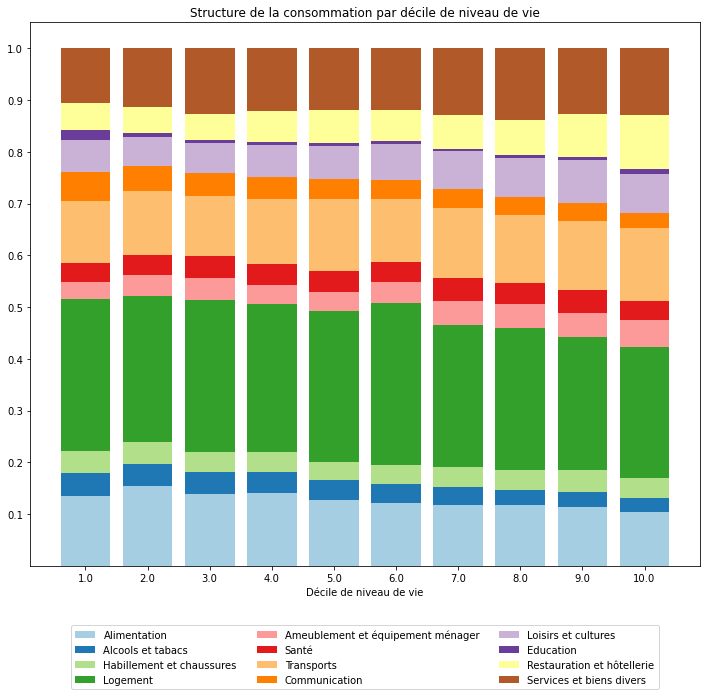

In [216]:
stacked_bar_plot(to_graph, 
                 variables = ["Part poste 0{}".format(i) for i in range(1, 10)] + ["Part poste {}".format(i) for i in range(10, 13)],
                 labels = label_postes_agreges,
                 title = 'Structure de la consommation par décile de niveau de vie',
                 xlabel = 'Décile de niveau de vie' ,
                 ylabel = '',
                 colors = list(sns.color_palette("Paired")))

In [217]:
to_graph['depenses_tva_exonere'] = to_graph['depenses_tot'] - to_graph['depenses_totales']
to_graph = to_graph[['depenses_tva_taux_plein' , 'depenses_tva_taux_intermediaire', 'depenses_tva_taux_reduit','depenses_tva_taux_super_reduit','depenses_tva_exonere','depenses_tot']]

In [218]:
to_graph

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere,depenses_tot
niveau_vie_decile,,,,,,
1.0,9351.130176,2632.561482,3458.686713,213.106678,5770.853469,21426.338557
2.0,10449.203142,2934.068516,4228.040510,355.685947,5927.270518,23894.268637
3.0,11678.689071,2945.571988,4172.592010,329.502806,6622.120329,25748.476216
4.0,12856.692371,3692.931747,4926.719433,411.037020,7308.996262,29196.376843
5.0,14834.428890,4164.091061,4763.146939,471.302380,7309.851143,31542.820400
6.0,17916.972382,4639.294660,5175.569406,510.616813,7787.411374,36029.864614
7.0,17814.766904,5807.253346,5414.361158,480.795612,7999.373541,37516.550538
8.0,21104.350546,6990.680691,6049.618466,585.533653,8062.898900,42793.082280
9.0,21601.194513,8435.208214,6542.310802,762.031701,8298.722217,45639.467491


In [219]:
to_graph.loc[:,'Part TVA exonere'] = to_graph['depenses_tva_exonere'] / to_graph['depenses_tot']
to_graph.loc[:,'Part TVA taux super réduit'] = to_graph['depenses_tva_taux_super_reduit'] / to_graph['depenses_tot']
to_graph.loc[:,'Part TVA taux réduit'] = to_graph['depenses_tva_taux_reduit'] / to_graph['depenses_tot']
to_graph.loc[:,'Part TVA taux intermédiaire'] = to_graph['depenses_tva_taux_intermediaire'] / to_graph['depenses_tot']
to_graph.loc[:,'Part TVA taux plein'] = to_graph['depenses_tva_taux_plein'] / to_graph['depenses_tot']

c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
c:\Users\veve1\miniconda3\envs\openfiscaenv\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [220]:
to_graph

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere,depenses_tot,Part TVA exonere,Part TVA taux super réduit,Part TVA taux réduit,Part TVA taux intermédiaire,Part TVA taux plein
niveau_vie_decile,,,,,,,,,,,
1.0,9351.130176,2632.561482,3458.686713,213.106678,5770.853469,21426.338557,0.269335,0.009946,0.161422,0.122866,0.436432
2.0,10449.203142,2934.068516,4228.040510,355.685947,5927.270518,23894.268637,0.248062,0.014886,0.176948,0.122794,0.437310
3.0,11678.689071,2945.571988,4172.592010,329.502806,6622.120329,25748.476216,0.257185,0.012797,0.162052,0.114398,0.453568
4.0,12856.692371,3692.931747,4926.719433,411.037020,7308.996262,29196.376843,0.250339,0.014078,0.168744,0.126486,0.440352
5.0,14834.428890,4164.091061,4763.146939,471.302380,7309.851143,31542.820400,0.231744,0.014942,0.151006,0.132014,0.470295
6.0,17916.972382,4639.294660,5175.569406,510.616813,7787.411374,36029.864614,0.216138,0.014172,0.143647,0.128762,0.497281
7.0,17814.766904,5807.253346,5414.361158,480.795612,7999.373541,37516.550538,0.213223,0.012816,0.144319,0.154792,0.474851
8.0,21104.350546,6990.680691,6049.618466,585.533653,8062.898900,42793.082280,0.188416,0.013683,0.141369,0.163360,0.493172
9.0,21601.194513,8435.208214,6542.310802,762.031701,8298.722217,45639.467491,0.181832,0.016697,0.143348,0.184823,0.473301


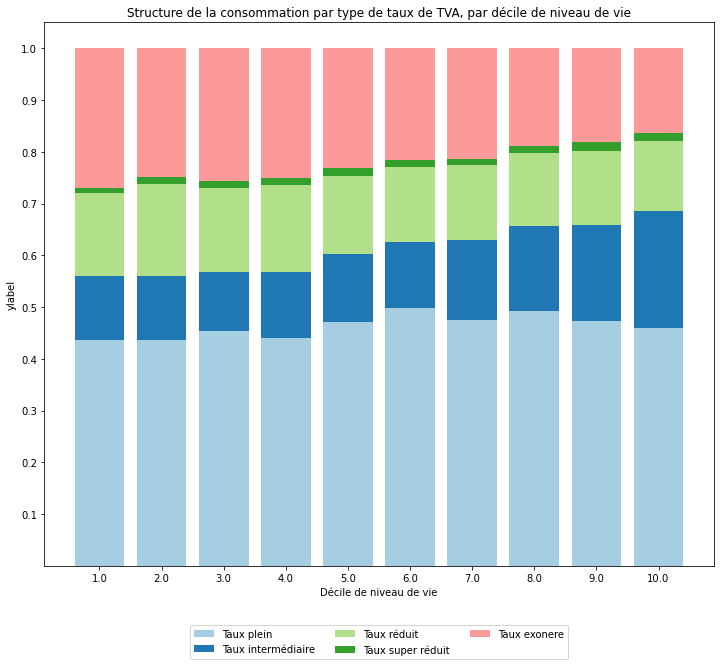

In [221]:
stacked_bar_plot(to_graph, 
                 variables = ['Part TVA taux plein','Part TVA taux intermédiaire','Part TVA taux réduit','Part TVA taux super réduit','Part TVA exonere'],
                 labels = ['Taux plein','Taux intermédiaire','Taux réduit','Taux super réduit','Taux exonere'],
                 title = 'Structure de la consommation par type de taux de TVA, par décile de niveau de vie',
                 xlabel = 'Décile de niveau de vie' ,
                 ylabel ='ylabel',
                 colors = list(sns.color_palette("Paired")))

In [ ]:
survey_scenario.tax_benefit_system